Sequential(
  (0): Bottleneck(
    (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (downsample): Sequential(
      (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (1): Bottleneck(
    (conv1): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, ke

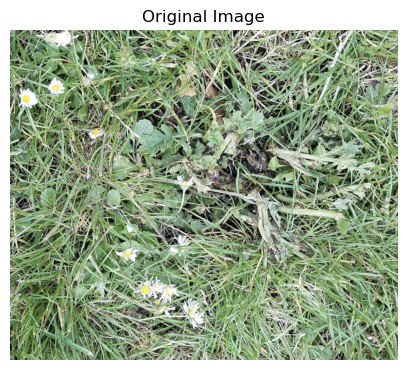

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from utils import load_model
from torchvision.models import resnet18, resnet152

# Change this line with your downloaded model
filename = '/Users/francescocenciarelli/Downloads/resnet152_weights_best_acc.tar' # pre-trained model path
use_gpu = True  # load weights on the gpu
model = resnet152(num_classes=1081) # 1081 classes in Pl@ntNet-300K, change the net here

load_model(model, filename=filename, use_gpu=False)

# Just printing the first layer
print(model.layer1)
# Define the image path and model
image_path = '/Users/francescocenciarelli/Desktop/Cambridge/summer_proj/sensor-cdt-team-challenge-2024/Model/Jupyter_Notebooks/Plantnet/testing_images/frapic11.png'  # Replace with your image path
model.eval()  # Ensure model is in evaluation mode

# take the big image
# Load and preprocess the image
image = Image.open(image_path).convert('RGB')

plt.figure(figsize=(5, 5))
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()



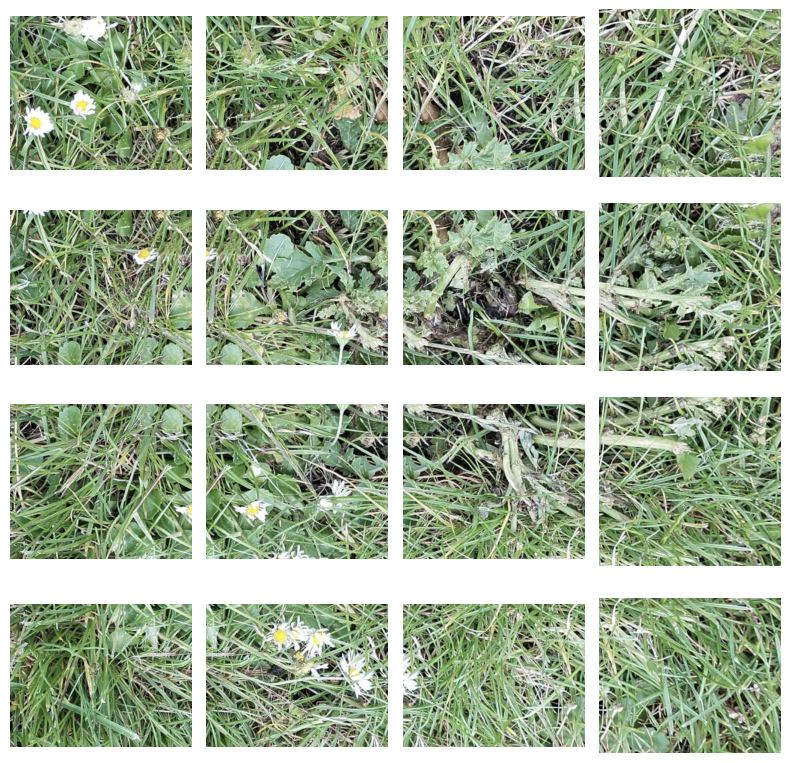

[<PIL.Image.Image image mode=RGB size=423x360 at 0x28AD29600>, <PIL.Image.Image image mode=RGB size=423x360 at 0x16B7FDAB0>, <PIL.Image.Image image mode=RGB size=423x360 at 0x16B7FD750>, <PIL.Image.Image image mode=RGB size=388x360 at 0x16B7FDA80>, <PIL.Image.Image image mode=RGB size=423x360 at 0x16BD631F0>, <PIL.Image.Image image mode=RGB size=423x360 at 0x28F34DBD0>, <PIL.Image.Image image mode=RGB size=423x360 at 0x16BD62FB0>, <PIL.Image.Image image mode=RGB size=388x360 at 0x28C823790>, <PIL.Image.Image image mode=RGB size=423x360 at 0x16BD631C0>, <PIL.Image.Image image mode=RGB size=423x360 at 0x28C822920>, <PIL.Image.Image image mode=RGB size=423x360 at 0x28C820B80>, <PIL.Image.Image image mode=RGB size=388x360 at 0x28C820250>, <PIL.Image.Image image mode=RGB size=423x332 at 0x28C820C10>, <PIL.Image.Image image mode=RGB size=423x332 at 0x16B0A5630>, <PIL.Image.Image image mode=RGB size=423x332 at 0x16B0A5600>, <PIL.Image.Image image mode=RGB size=388x332 at 0x16B0A5C00>]


In [19]:
# Segment the image 

from PIL import Image
import matplotlib.pyplot as plt

def segment_image(image_path, rows, cols, overlap_ratio):
    # Load the image
    image = Image.open(image_path).convert('RGB')

    # Determine the size of each segment
    width, height = image.size
    segment_width = width // cols
    segment_height = height // rows

    # Overlap size in pixels
    overlap_width = int(segment_width * overlap_ratio)
    overlap_height = int(segment_height * overlap_ratio)

    # Create a list to hold the segments
    segments = []

    # Divide the image into overlapping segments
    for i in range(rows):
        for j in range(cols):
            # Calculate overlap by expanding the region slightly
            left = max(j * segment_width - overlap_width, 0)
            top = max(i * segment_height - overlap_height, 0)
            right = min(left + segment_width + 2 * overlap_width, width)
            bottom = min(top + segment_height + 2 * overlap_height, height)

            # Ensure we do not go out of image boundaries
            if right > width:
                right = width
            if bottom > height:
                bottom = height

            # Crop the image and save to the segments list
            segment = image.crop((left, top, right, bottom))
            segments.append(segment)

    # Plot each segment
    fig, axes = plt.subplots(rows, cols, figsize=(cols*2, rows*2))
    for ax, segment in zip(axes.flatten(), segments):
        ax.imshow(segment)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

    return segments


# Usage exampl
path_img = '/Users/francescocenciarelli/Desktop/Cambridge/summer_proj/sensor-cdt-team-challenge-2024/Model/Jupyter_Notebooks/Plantnet/testing_images/frapic11.png'
img_segments = segment_image(path_img, 4, 4, 0.1)  # Adjust 'path_to_your_image.jpg' and grid size (rows, cols) as needed

print(img_segments)


In [13]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

104
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


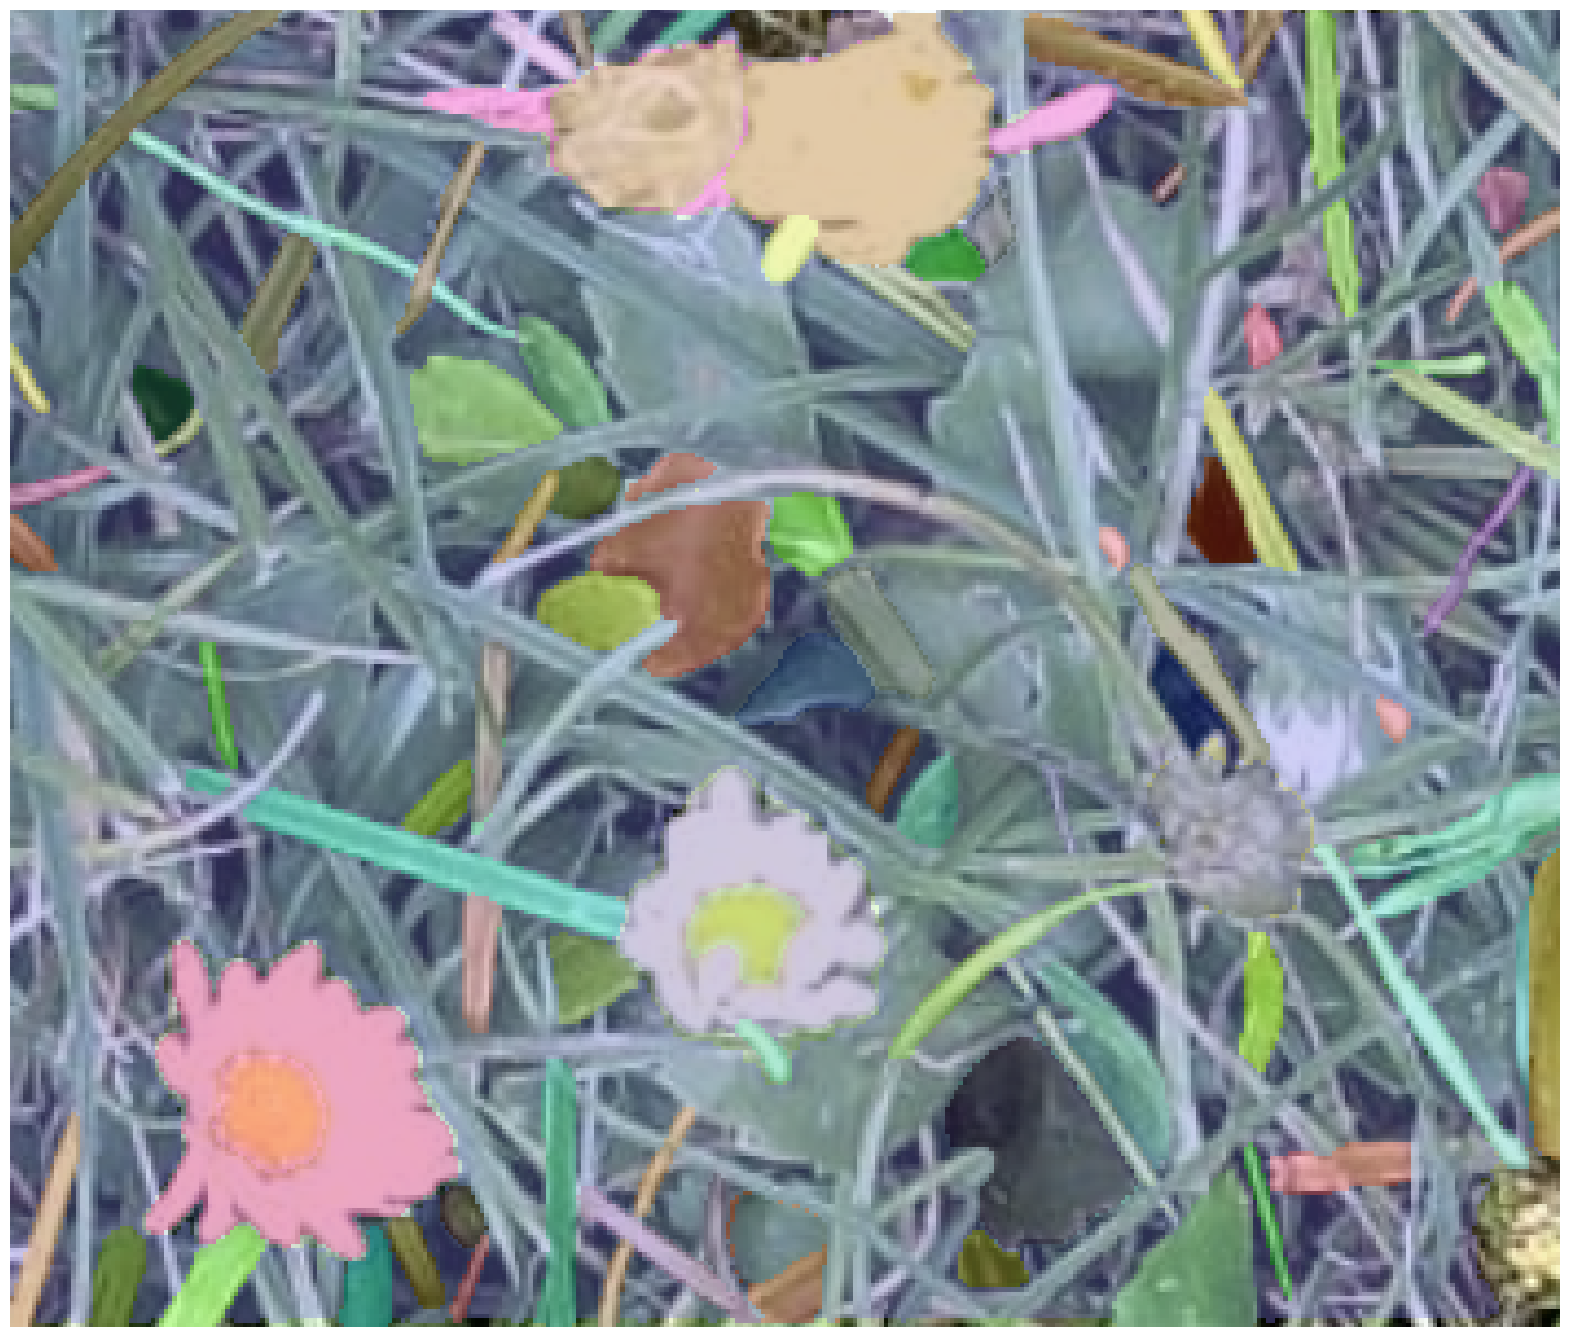

100
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


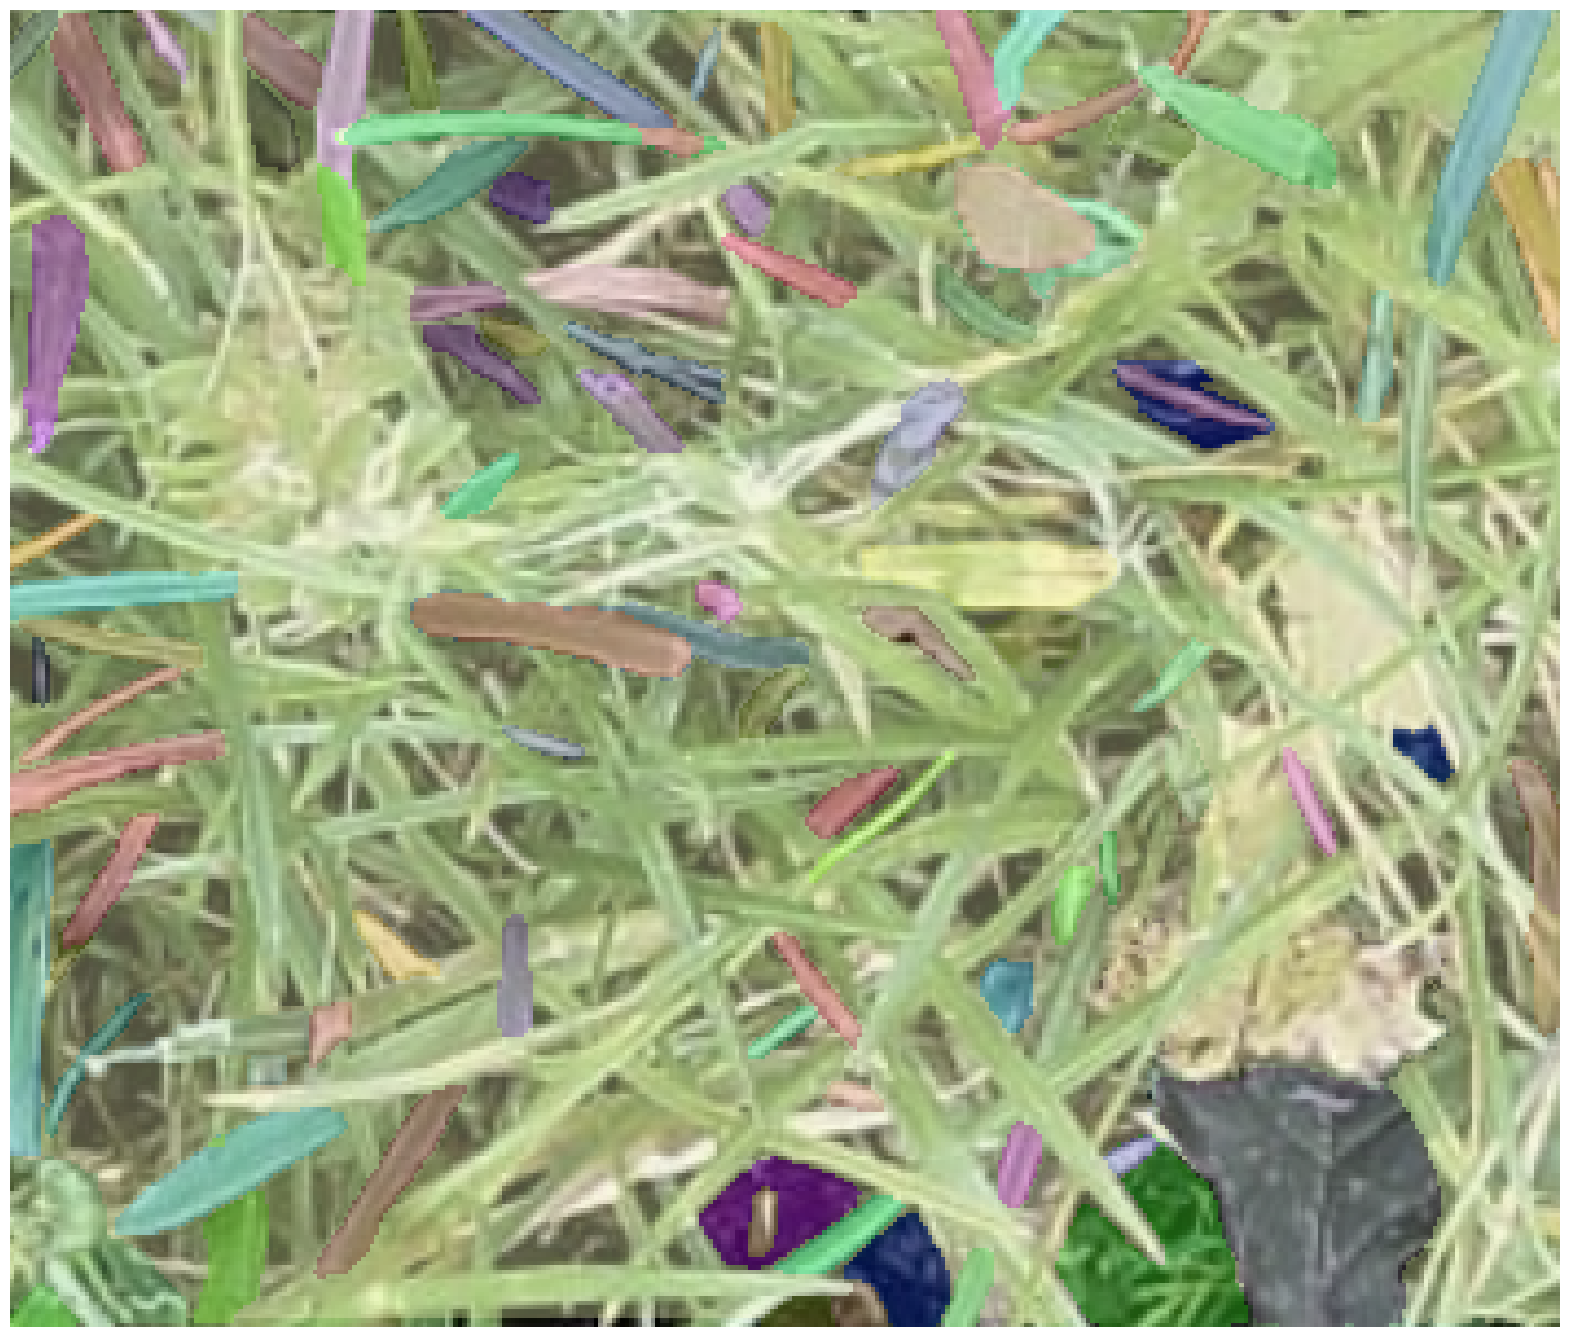

100
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


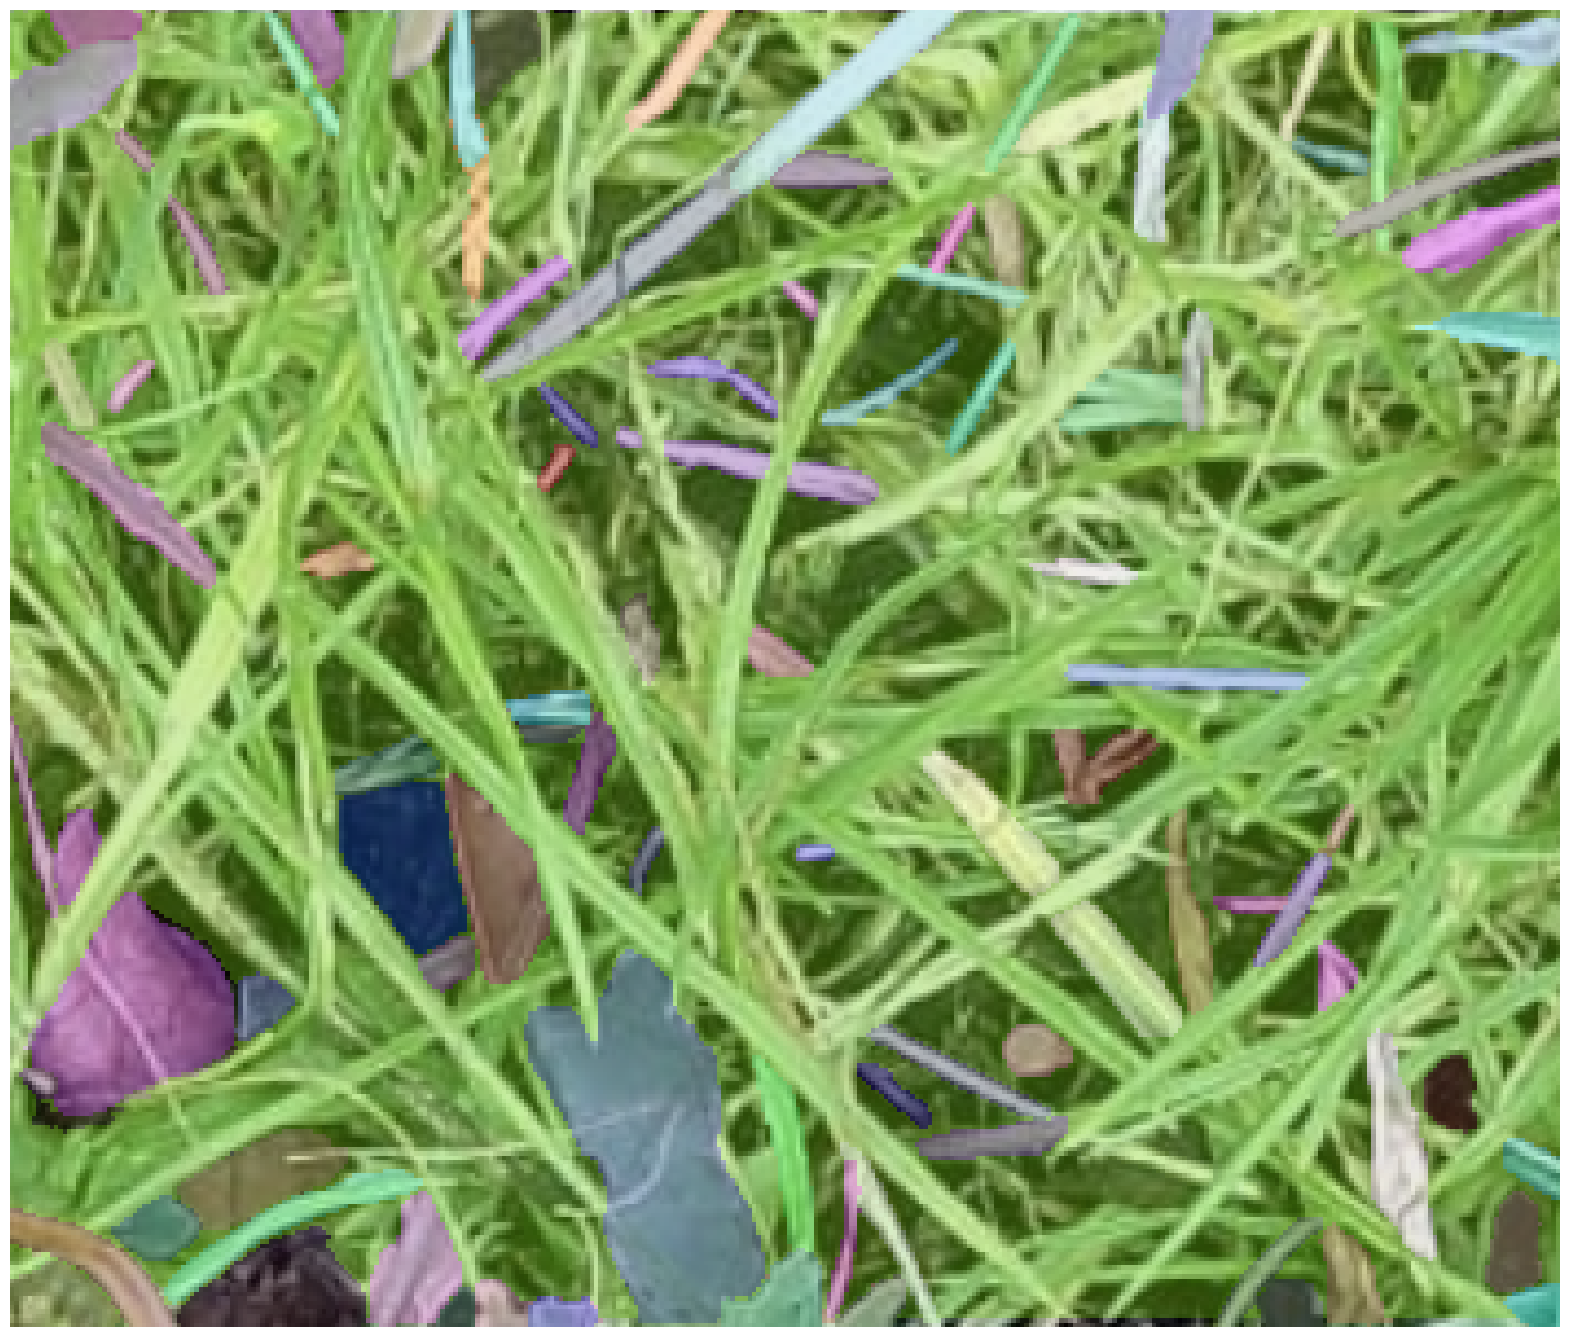

103
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


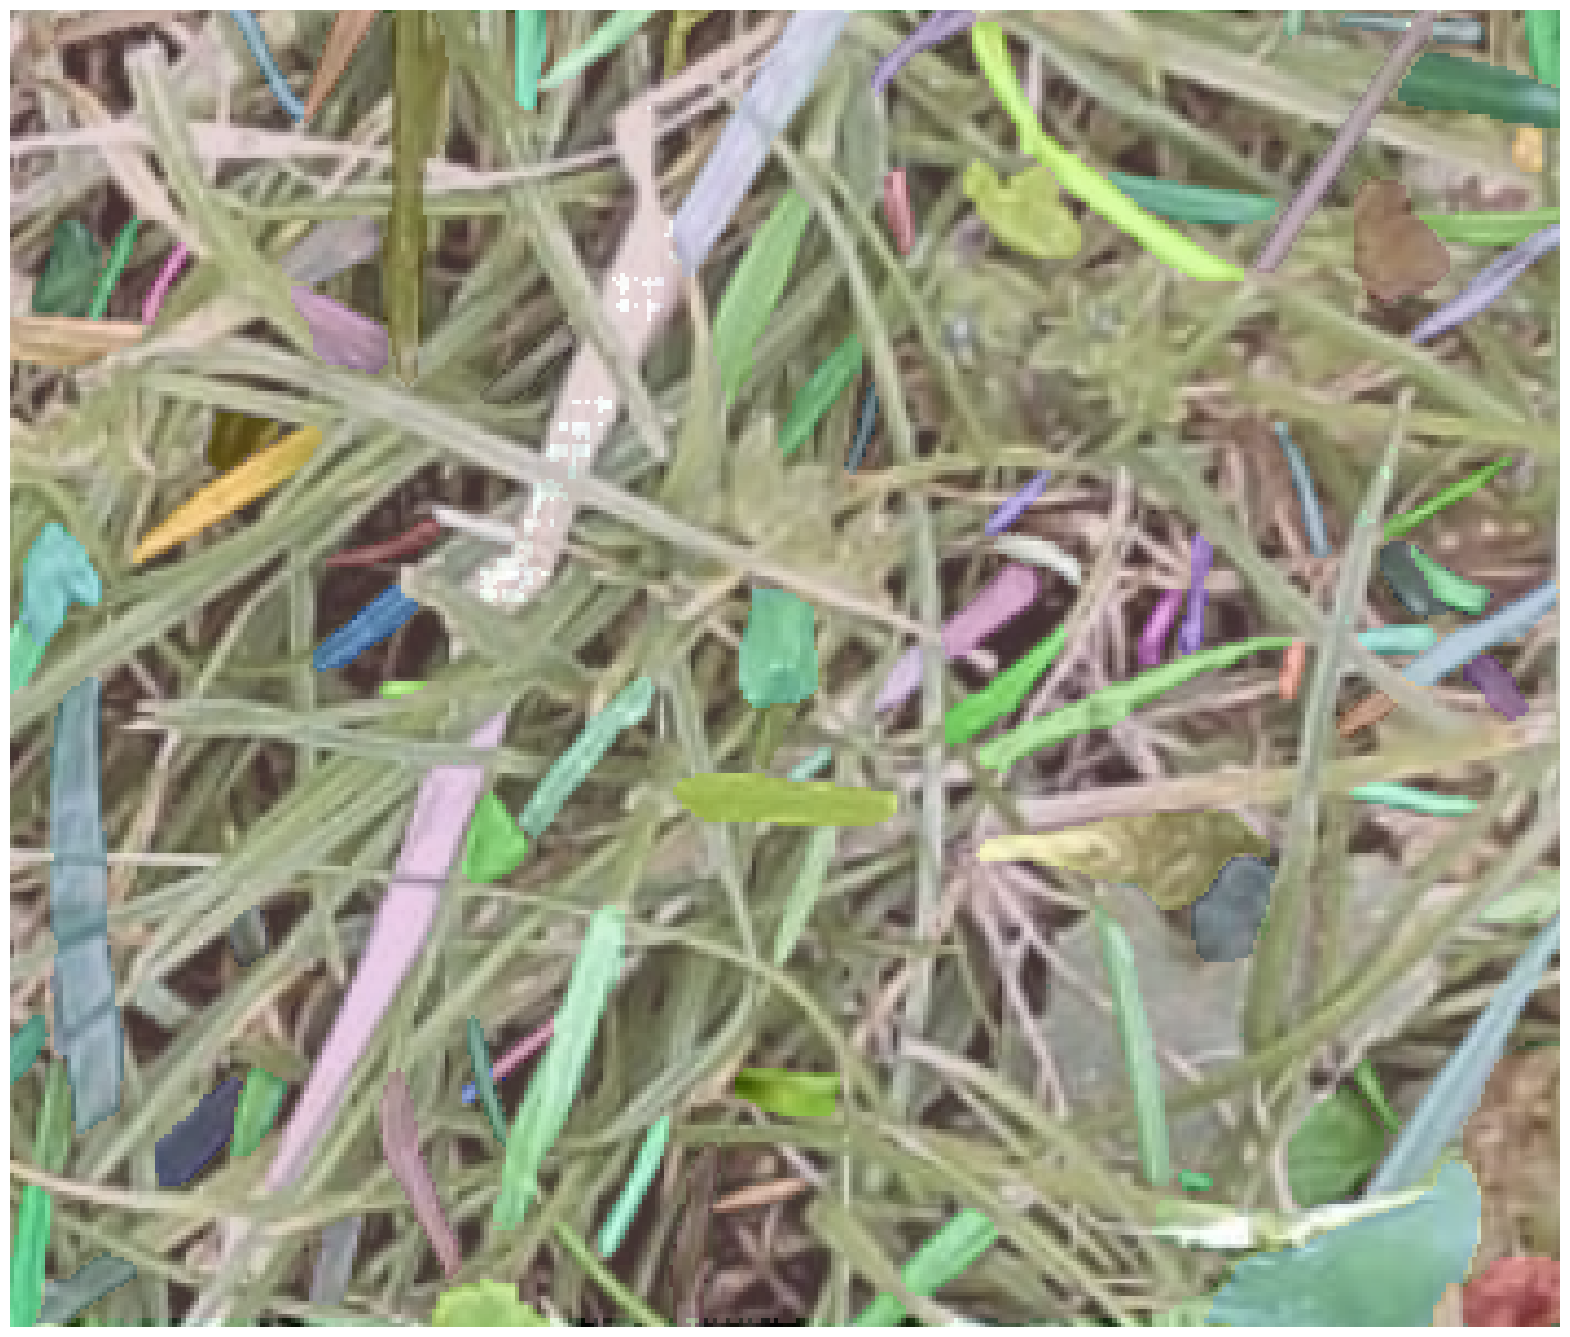

104
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


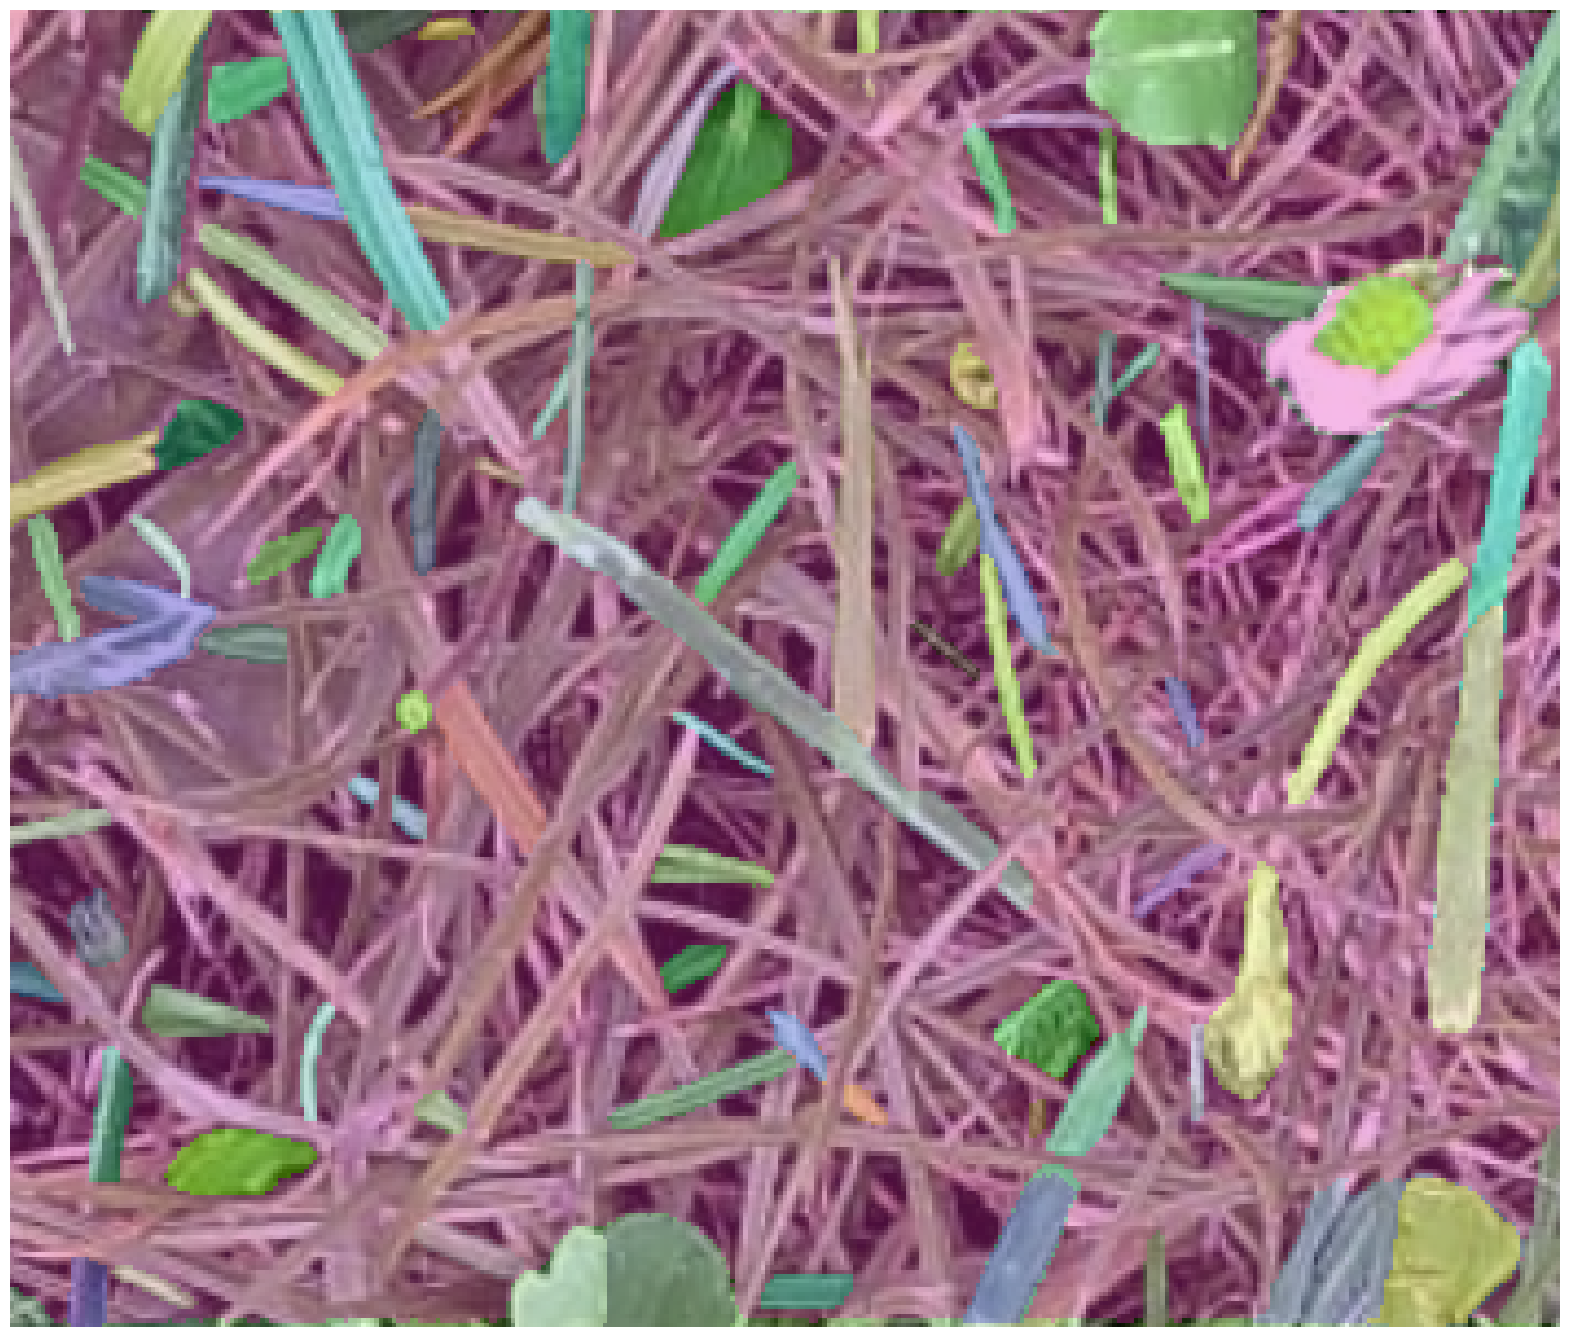

119
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


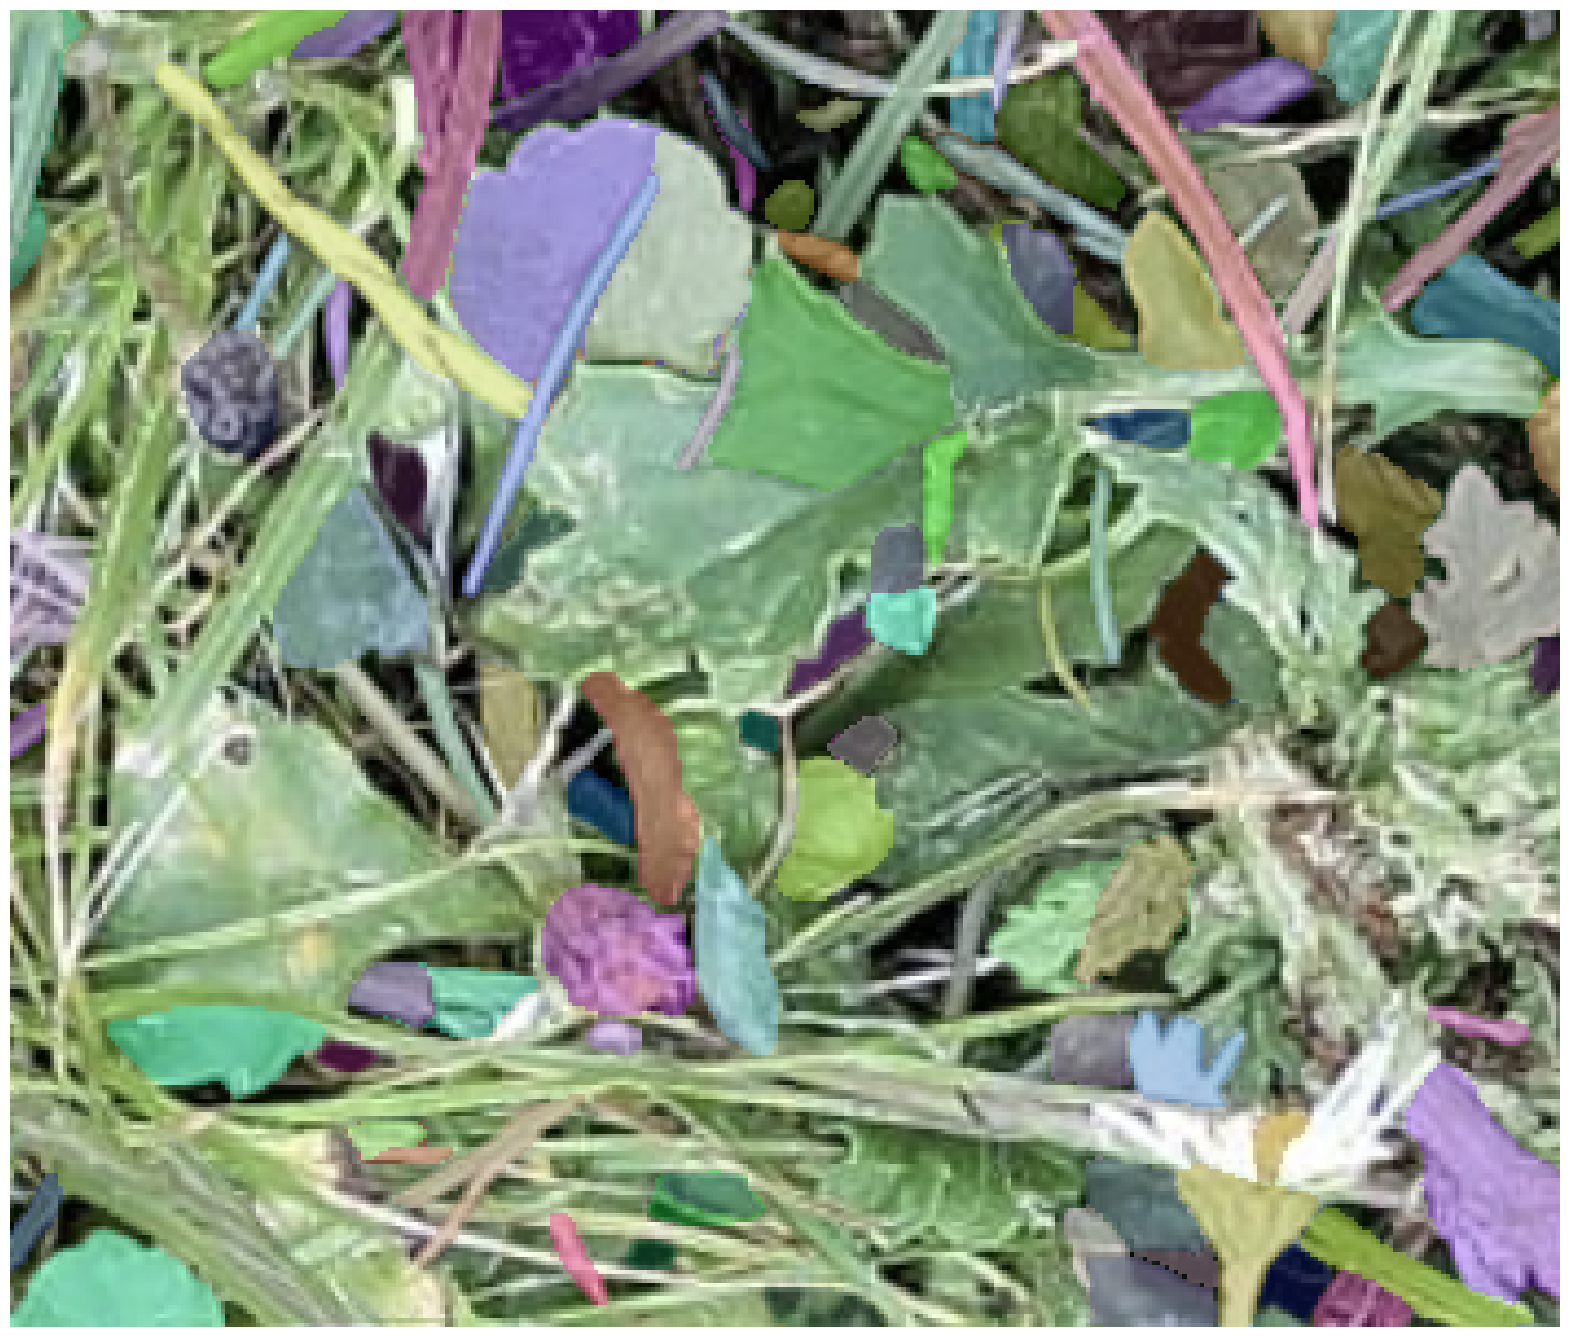

150
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


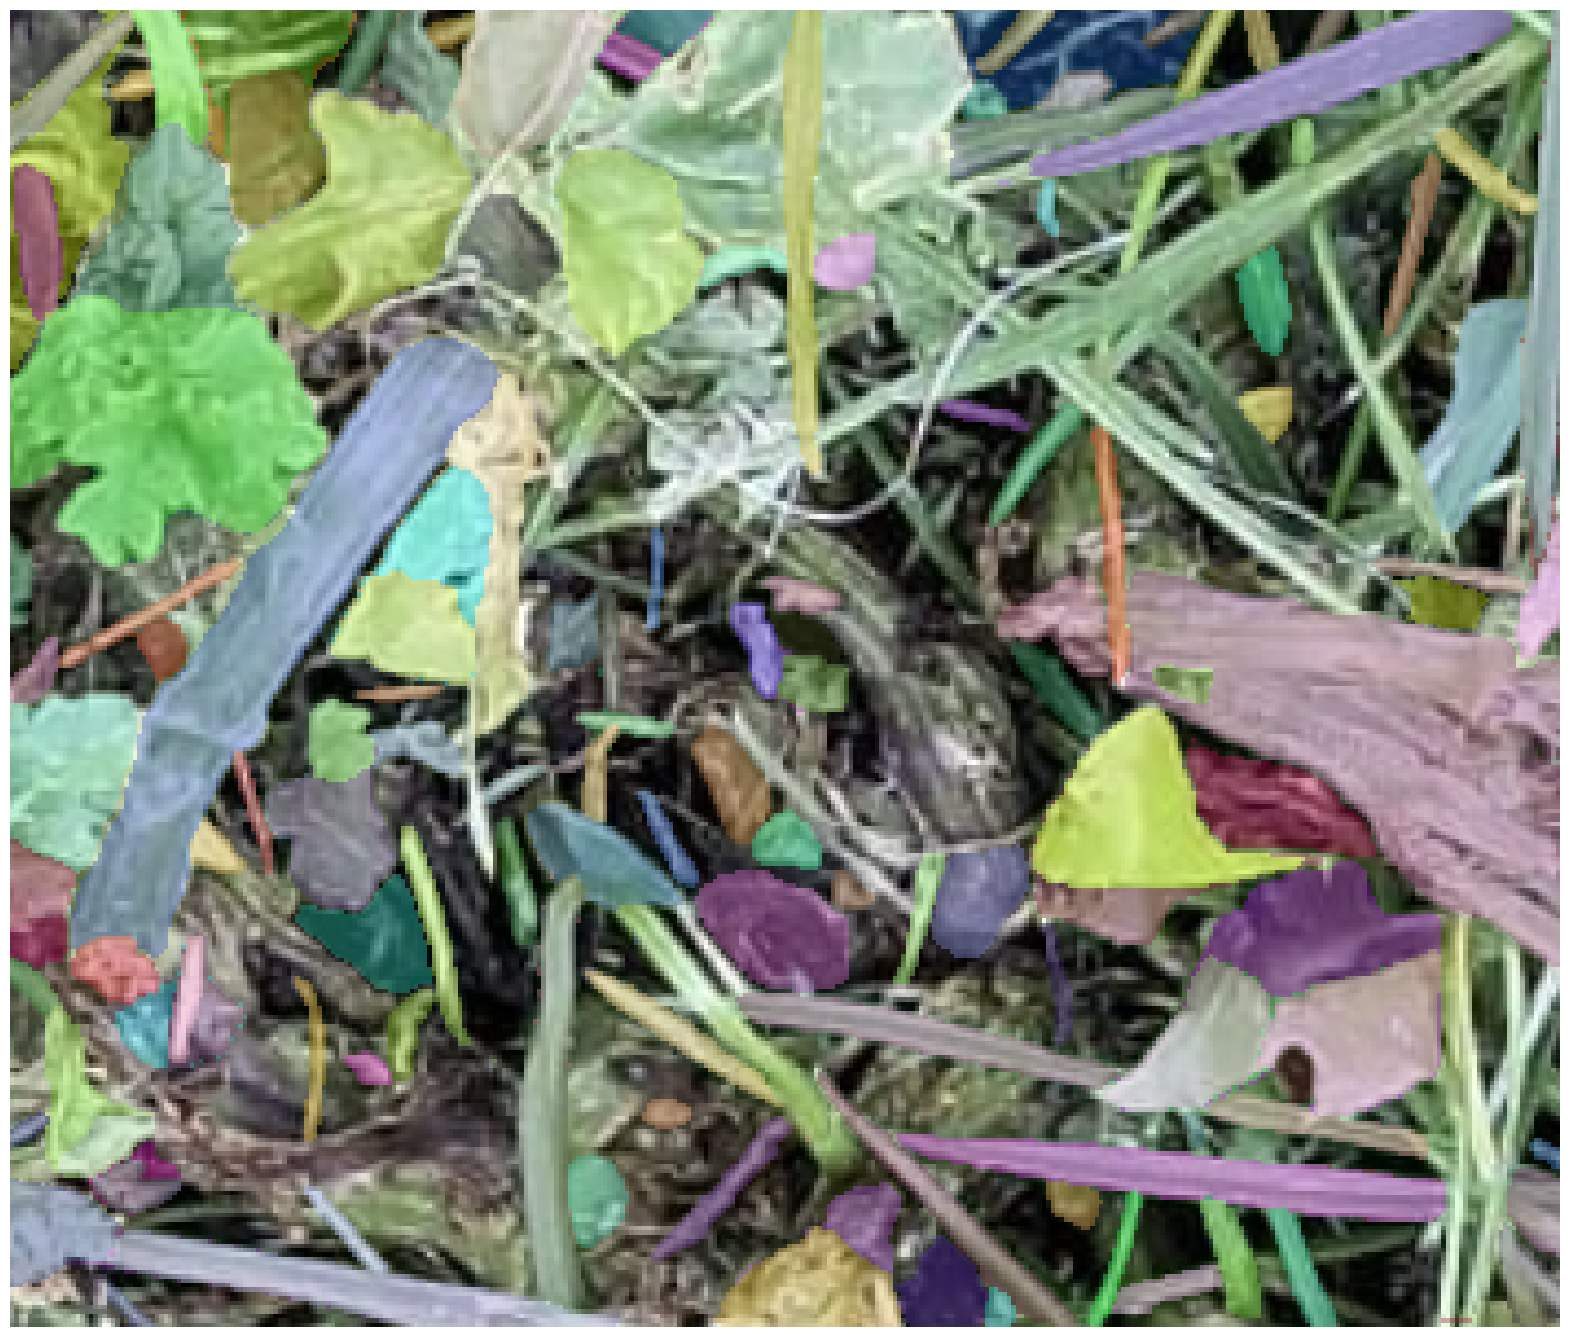

113
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


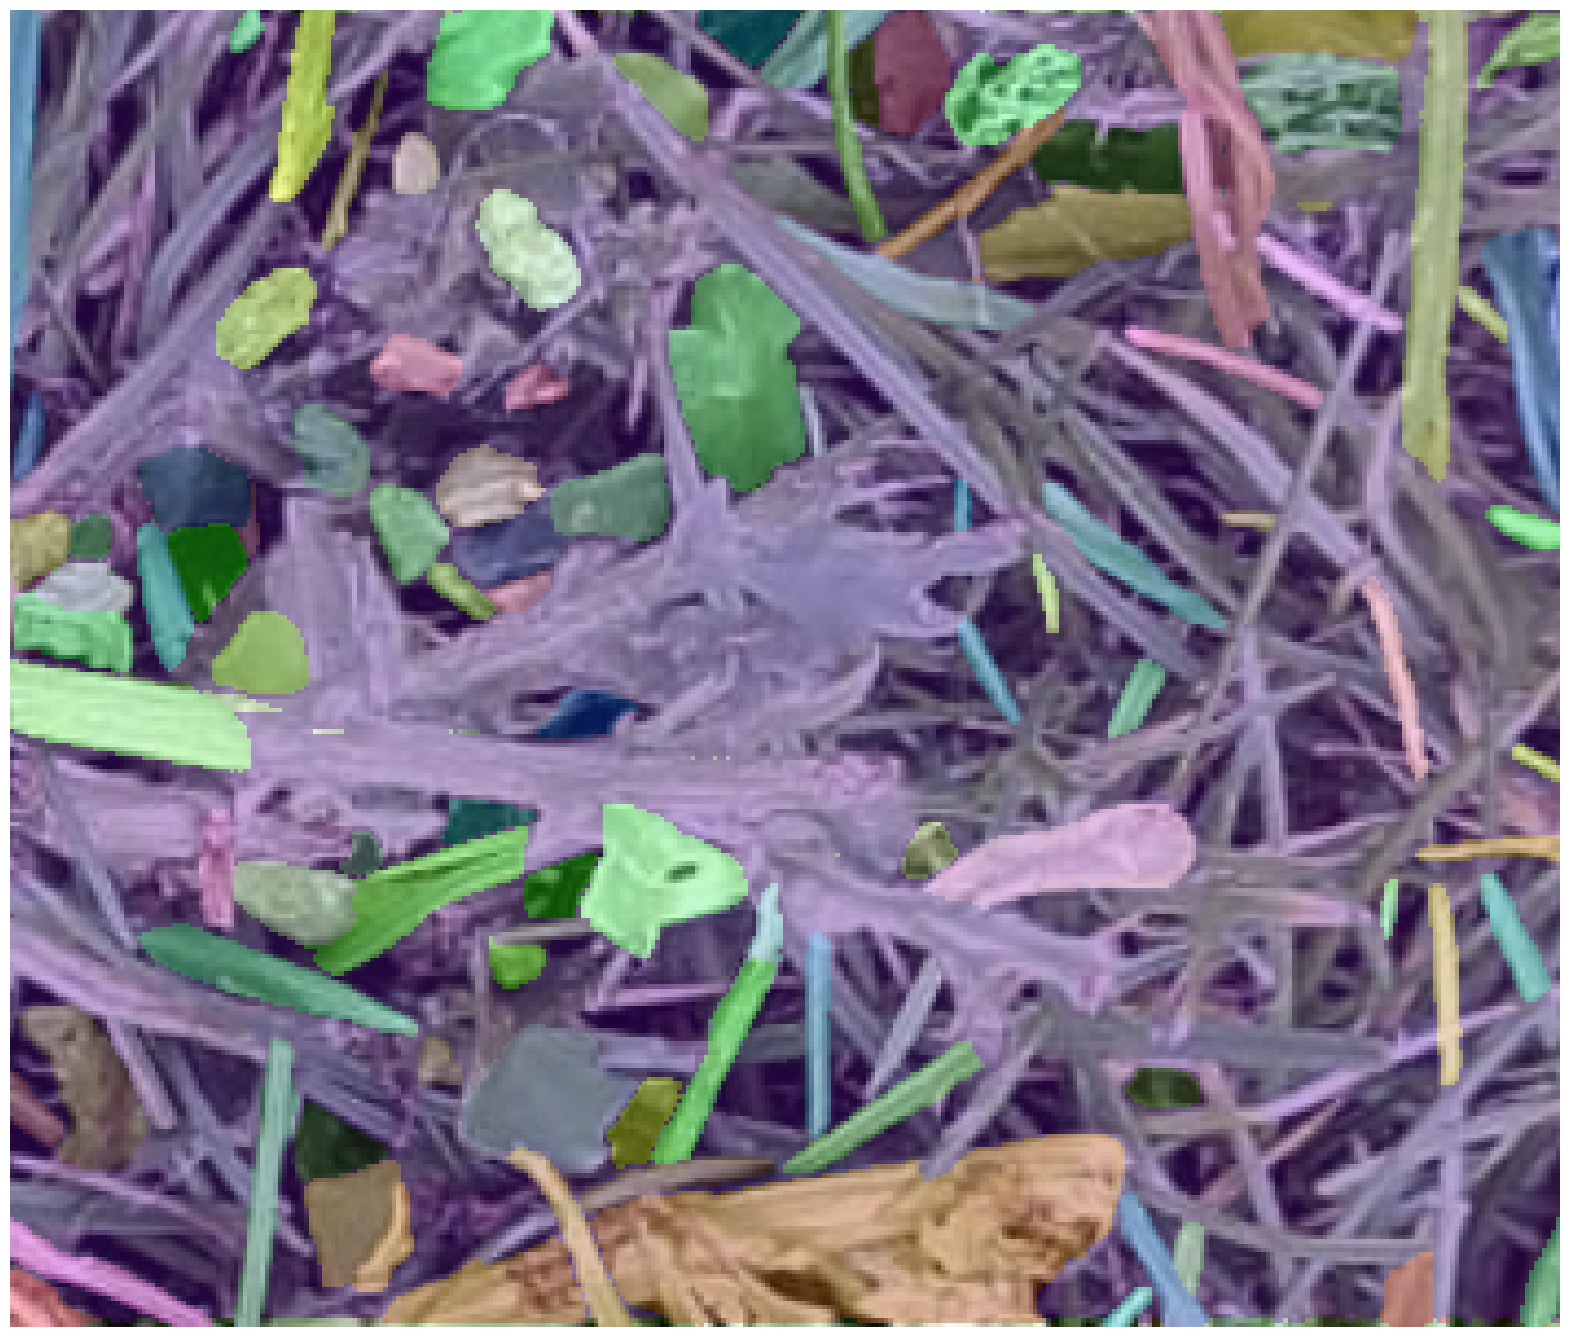

120
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


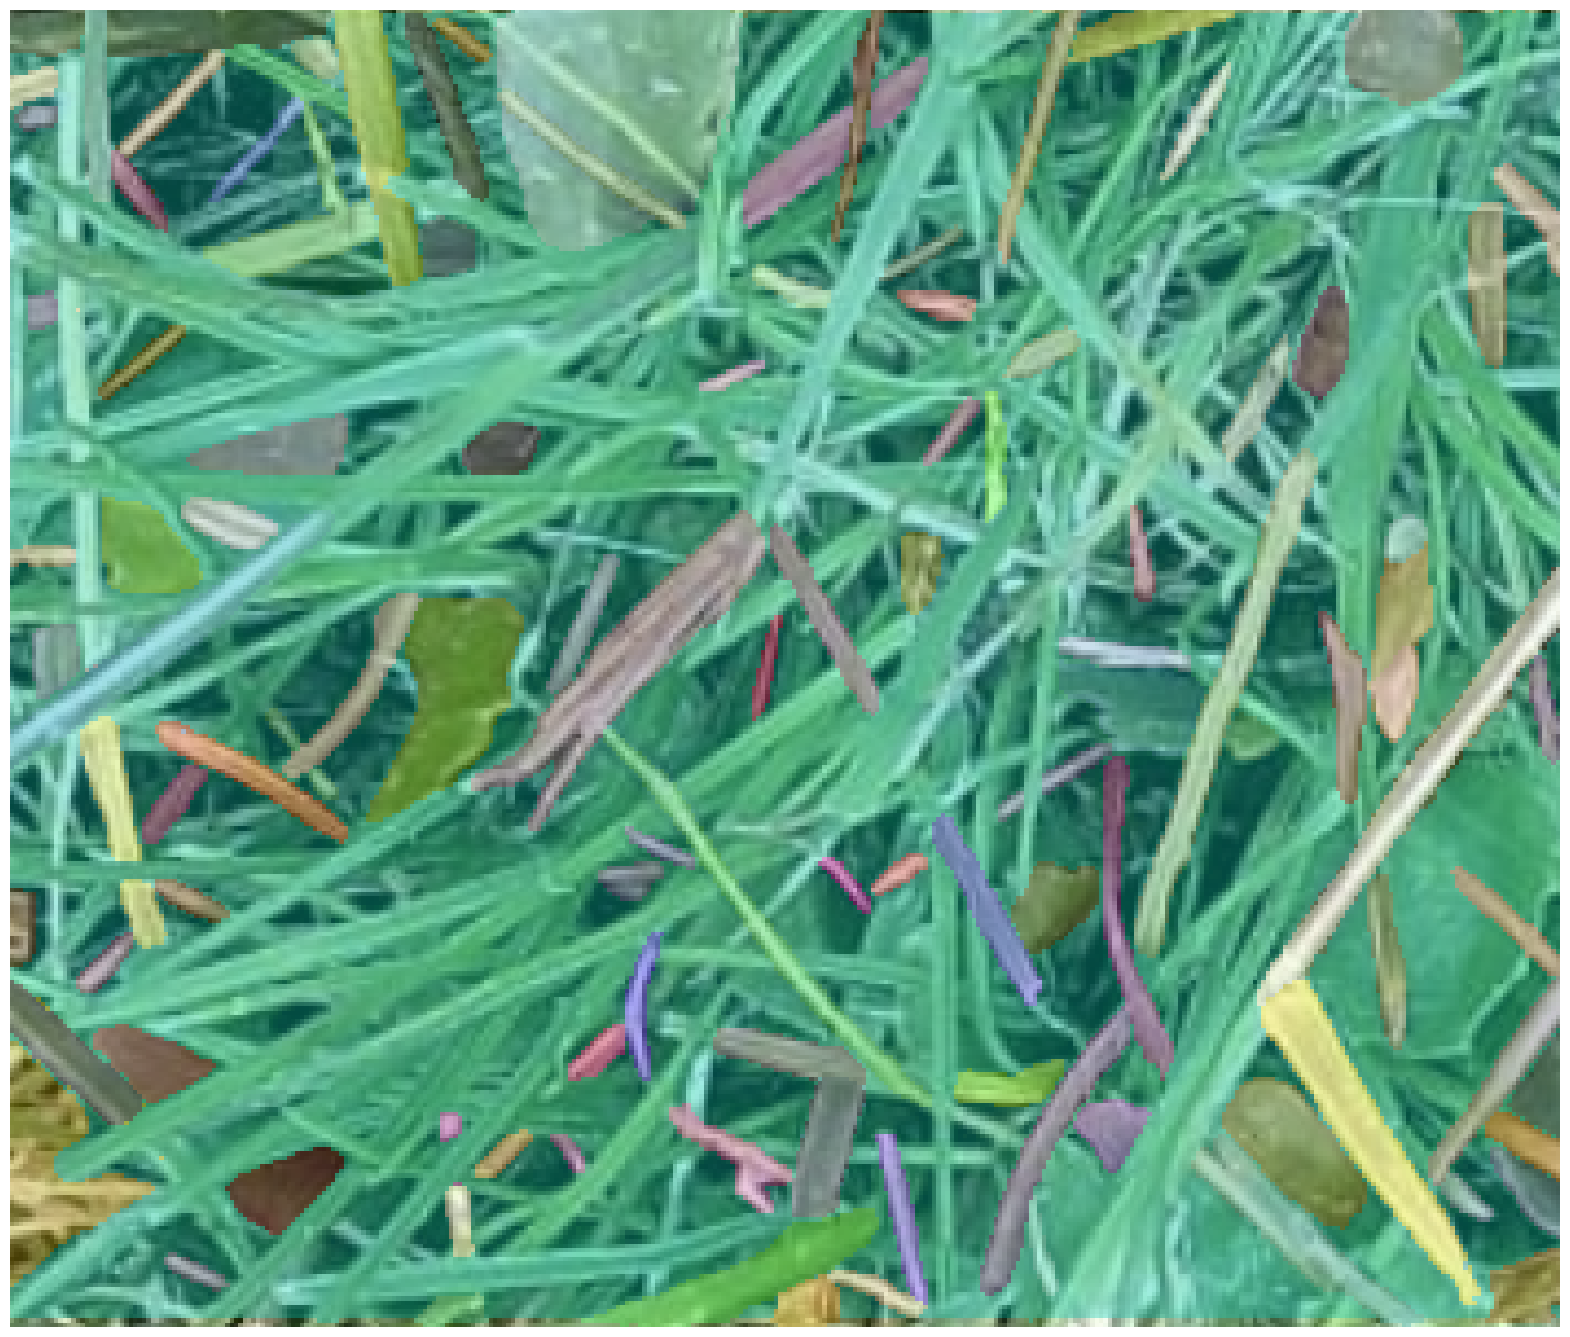

133
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


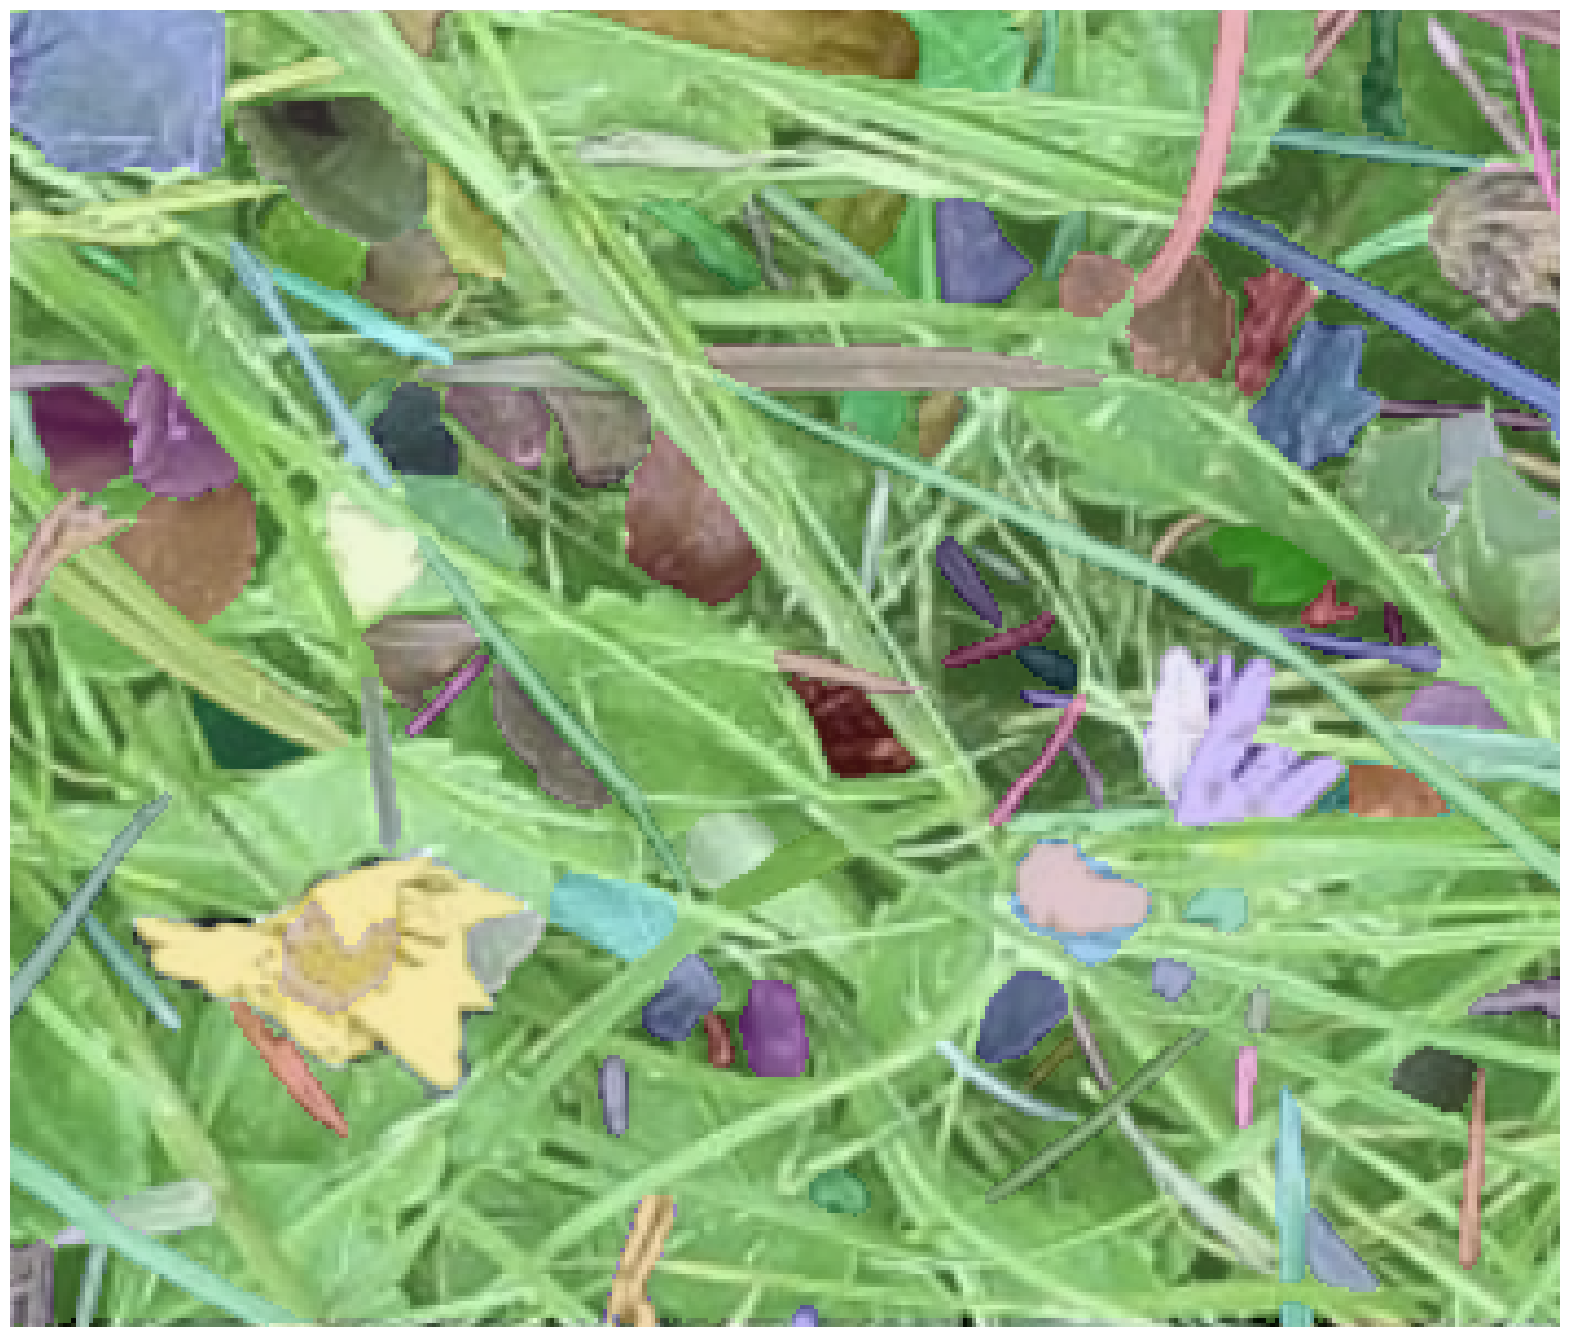

KeyboardInterrupt: 

In [15]:
#  Carry out the semantic segmentation on the images
from segment_anything import SamPredictor, sam_model_registry
from PIL import Image
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
import numpy as np
sam = sam_model_registry["vit_h"](checkpoint="/Users/francescocenciarelli/Downloads/sam_vit_h_4b8939.pth")
mask_generator = SamAutomaticMaskGenerator(sam)


mask_array = []

for image in img_segments:
    image_np = np.array(image)
    # Generate masks
    masks = mask_generator.generate(image_np)
    mask_array.append(masks)
    print(len(masks))
    print(masks[0].keys())
    plt.figure(figsize=(20,20))
    plt.imshow(image)
    show_anns(masks)
    plt.axis('off')
    plt.savefig('test.png')
    plt.show() 

